<a href="https://colab.research.google.com/github/v-aguiar/product-recomendation/blob/main/Product_recomendation_by_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow
from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
import os
os.environ['ROBOFLOW_API_KEY'] = 'ONWNTApERS1QsV1MhMcG'

In [3]:
rf = Roboflow(api_key=os.environ['ROBOFLOW_API_KEY'])
project = rf.workspace("ml-cnwda").project("image_recomendation")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to image_recomendation-1 in folder:: 100%|██████████| 458/458 [00:00<00:00, 6490.71it/s]


In [4]:
from PIL import Image
import numpy as np
import tensorflow as tf

In [5]:
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Redimensiona para 224x224
    img_array = np.array(img)  # Converte a imagem para array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão para batch
    return tf.keras.applications.resnet50.preprocess_input(img_array)

In [6]:
from tensorflow.keras.applications import ResNet50

# Carrega o modelo ResNet50 pré-treinado sem a camada final
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path):
    processed_img = load_and_preprocess_image(img_path)
    features = model.predict(processed_img)
    return features.flatten()  # Achata as características para um vetor 1D


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(features1, features2):
    return cosine_similarity([features1], [features2])[0][0]


In [8]:
def recommend_images(query_img_path, image_paths, top_n=5):
    query_features = extract_features(query_img_path)
    similarities = []
    for img_path in image_paths:
        img_features = extract_features(img_path)
        similarity = calculate_similarity(query_features, img_features)
        similarities.append((img_path, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return [img_path for img_path, _ in similarities[:top_n]]


In [9]:
import matplotlib.pyplot as plt

def show_recommendations(query_img_path, recommended_image_paths):
    fig, axes = plt.subplots(1, len(recommended_image_paths) + 1, figsize=(15, 5))
    axes[0].imshow(Image.open(query_img_path))
    axes[0].set_title('Consulta')
    axes[0].axis('off')
    for i, img_path in enumerate(recommended_image_paths):
        axes[i + 1].imshow(Image.open(img_path))
        axes[i + 1].set_title(f'Recomenda {i + 1}')
        axes[i + 1].axis('off')
    plt.show()


In [22]:
!curl -L -o product_images.zip https://github.com/v-aguiar/product-recomendation/raw/refs/heads/main/product_images.zip
!unzip product_images.zip



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10.5M  100 10.5M    0     0  7446k      0  0:00:01  0:00:01 --:--:-- 28.4M


In [23]:
image_dir = '/content/product_images'
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg') or fname.endswith('.png')]

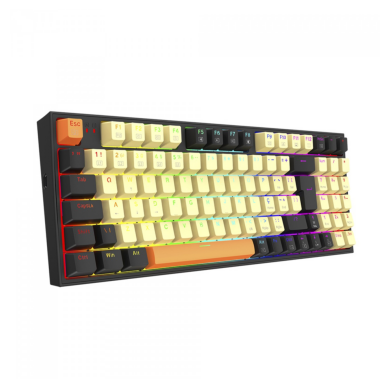

In [30]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL da imagem no GitHub
image_url = 'https://github.com/v-aguiar/product-recomendation/blob/main/teclado.jpg?raw=true'

# Baixar a imagem
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Caminho para salvar a imagem
save_path = '/content/imagem.jpg'
# Salvar a imagem
img.save(save_path)

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Desliga os eixos
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

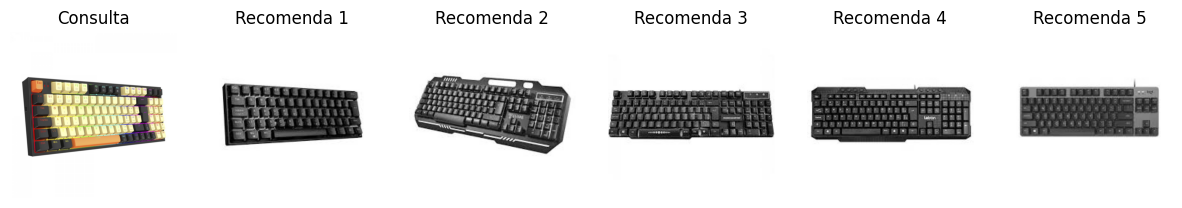

In [31]:
# Caminho da imagem de consulta
query_img_path = save_path

# Lista de caminhos das imagens recomendadas
recommended_image_paths = recommend_images(query_img_path, image_paths)

# Exibe as recomendações
show_recommendations(query_img_path, recommended_image_paths)